<a href="https://colab.research.google.com/github/gabriela-coder/kaggle-bike-sharing-demand/blob/main/bikesharing_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting things up**

---



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# **Checking and modifying data for better analysis**

---



In [ ]:
bike_train = pd.read_csv('/content/drive/MyDrive/trab_lp/train.csv')
bike_train.head()
#read the train file and shows the first rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
def time_hours(row):
    row.datetime = int(row.datetime[11]+row.datetime[12])
    return row
bike_train.apply(time_hours, axis='columns')
new_bike_train = bike_train.apply(time_hours, axis='columns')
new_bike_train.head()
#change the datetime so it only shows the hours

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike_sorted = bike_train.sort_values(by='datetime',ascending=True)
bike_sorted
#testing for holes in time data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
new_bike_train.isnull().sum()
#testing for null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
bike_test = pd.read_csv('/content/drive/MyDrive/trab_lp/test.csv')
bike_test.isnull().sum()
#testing for nulls on test file

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [ ]:
new_bike_train.head(30)
#olhadinha no teste

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# **Analising data for correlation**

---




[Text(0.5, 1.0, 'Number of bikes comparison between workingdays and weekends')]

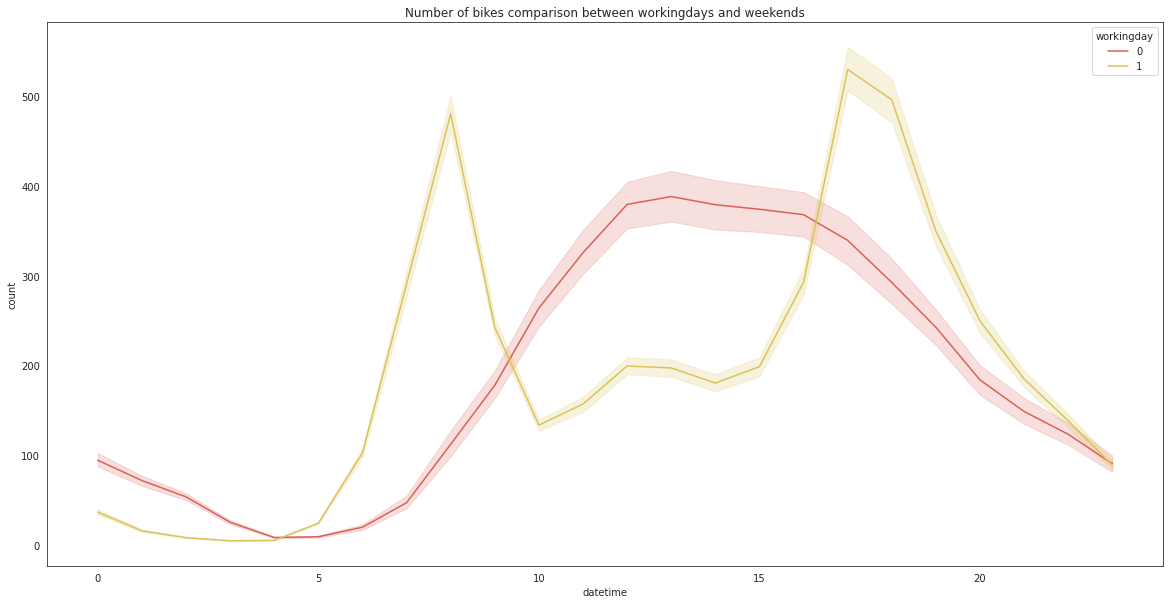

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=new_bike_train, x='datetime', y='count', hue='workingday', ax=ax)
ax.set(title='Number of bikes comparison between workingdays and weekends')

[Text(0.5, 1.0, 'Number of bikes comparison between weathers, (3= really bad weather)')]

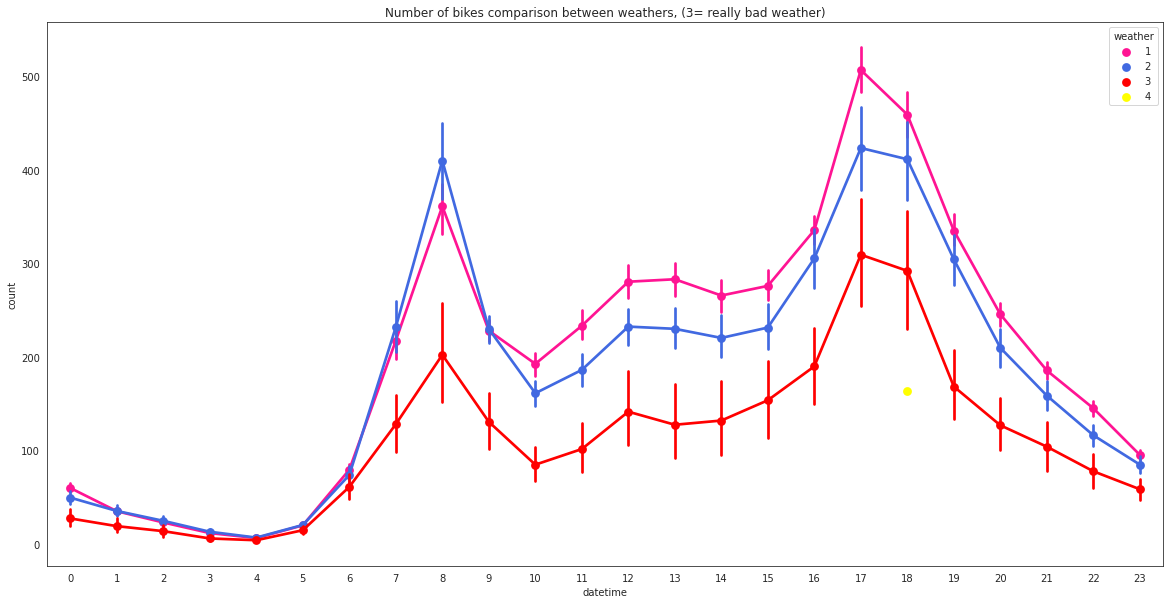

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style("white")
sns.pointplot(data=new_bike_train, x='datetime', y='count', hue='weather', palette=["deeppink", "royalblue","red","yellow"], ax=ax)
ax.set(title='Number of bikes comparison between weathers, (3= really bad weather)')

[Text(0.5, 1.0, 'Number of bikes compatison between seasons, 1= spring, 2 = summer, 3 = fall, 4 = winter')]

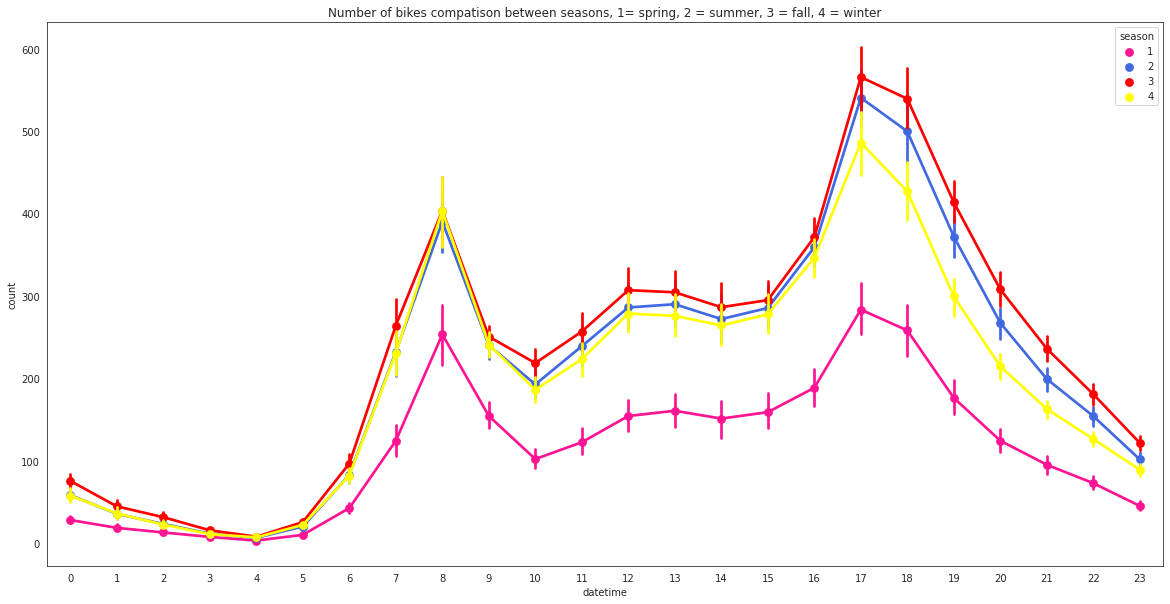

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style("white")
sns.pointplot(data=new_bike_train, x='datetime', y='count', hue='season', palette=["deeppink", "royalblue","red","yellow"], ax=ax)
ax.set(title='Number of bikes compatison between seasons, 1= spring, 2 = summer, 3 = fall, 4 = winter')

In [ ]:
#groups the temperature in hot, average, and cold
def temp_group(row):
    if row.temp > 30:
      row.temp = 'hot'
      return row
    if row.temp < 15:
      row.temp = 'cold'
      return row
    else:
      row.temp = 'average'
      return row

temperatures = new_bike_train.apply(temp_group, axis='columns')

In [ ]:
#groups the humidity in 3 (wet), 2 and 1(dry)
def hum_group(row):
    if row.humidity <35:
      row.humidity = 1
      return row
    elif row.humidity >75:
      row.humidity = 3
      return row
    else:
      row.humidity = 2
      return row

humidities = new_bike_train.apply(hum_group, axis='columns')

[Text(0.5, 1.0, 'Number of bikes in diferent temperatures')]

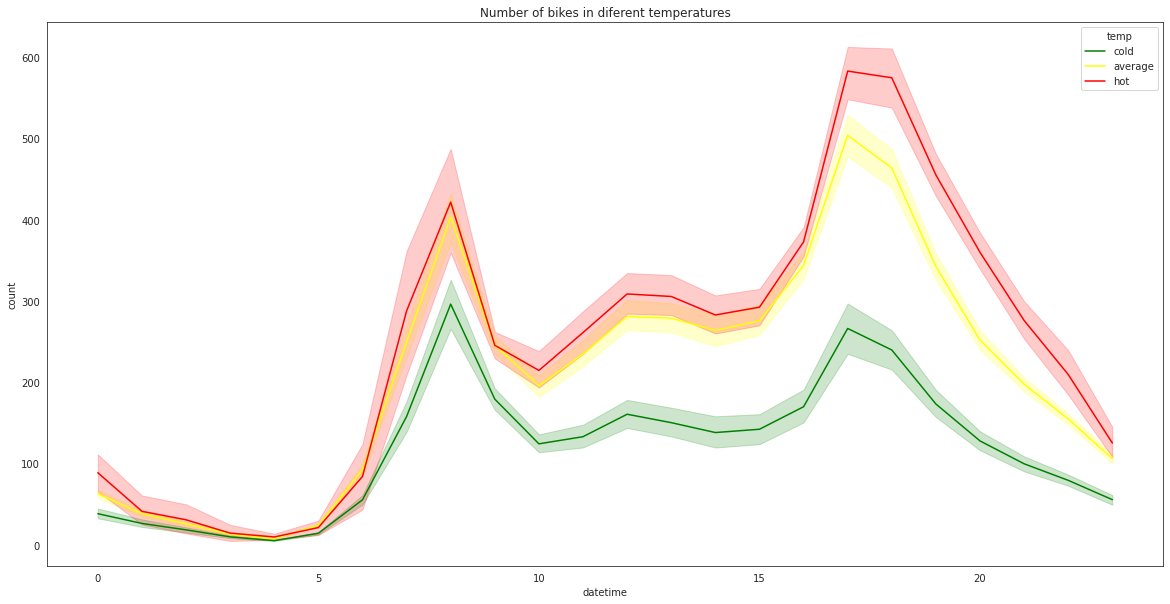

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style("white")
sns.lineplot(data=temperatures, x='datetime', y='count', hue='temp', palette=["green", "yellow","red"], ax=ax)
ax.set(title='Number of bikes in diferent temperatures')

[Text(0.5, 1.0, 'Number of bikes in diferent humidities')]

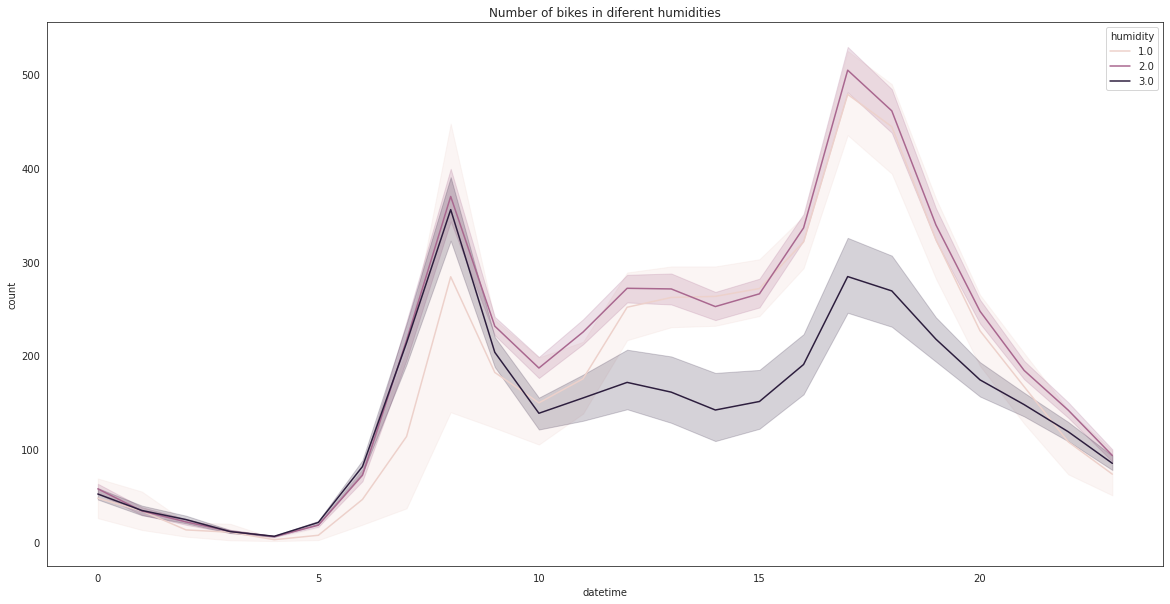

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style("white")
sns.lineplot(data=humidities, x='datetime', y='count', hue='humidity',  ax=ax)
ax.set(title='Number of bikes in diferent humidities')

In [ ]:
def time_days(row):
    row.datetime = int(row.datetime[8]+row.datetime[9])
    return row
days = bike_train.apply(time_days, axis='columns')
#change the datetime so it only shows the month

In [ ]:
#getting months
def time_months(row):
    row.datetime = int(row.datetime[5]+row.datetime[6])
    return row
months = bike_train.apply(time_months, axis='columns')
months
#change the datetime so it only shows the month

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
#getting years
def time_years(row):
    row.datetime = int(row.datetime[0]+row.datetime[1]+row.datetime[2]+row.datetime[3])
    return row
years = bike_train.apply(time_years, axis='columns')
years
#change the datetime so it only shows the month

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


[Text(0.5, 1.0, 'Count of bikes on different months')]

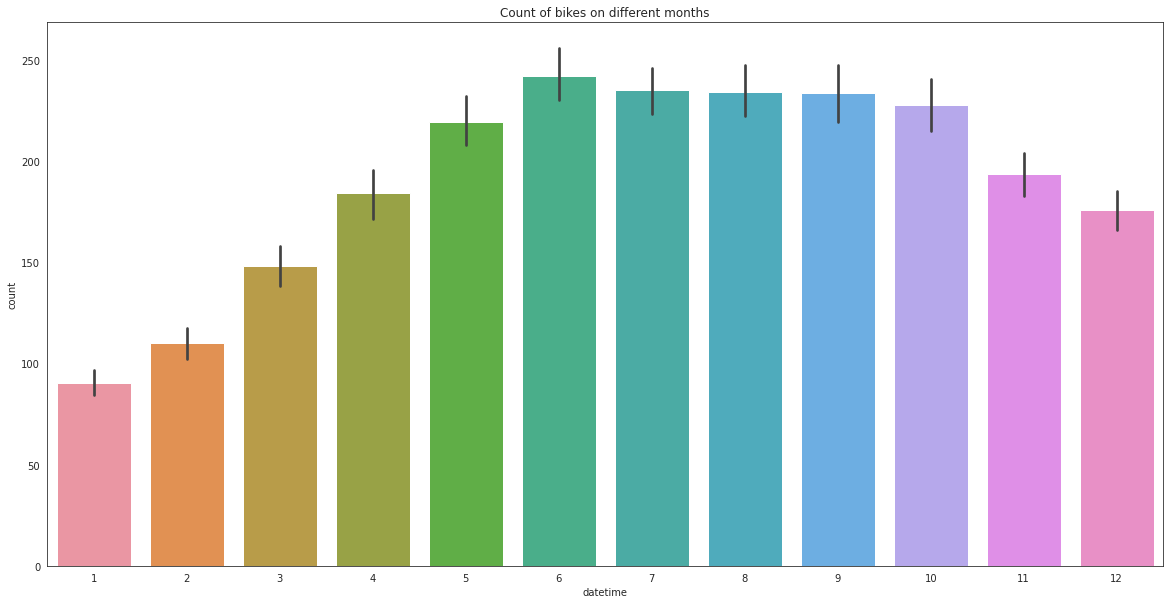

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=months, x='datetime', y='count', ax=ax)
ax.set(title='Count of bikes on different months')

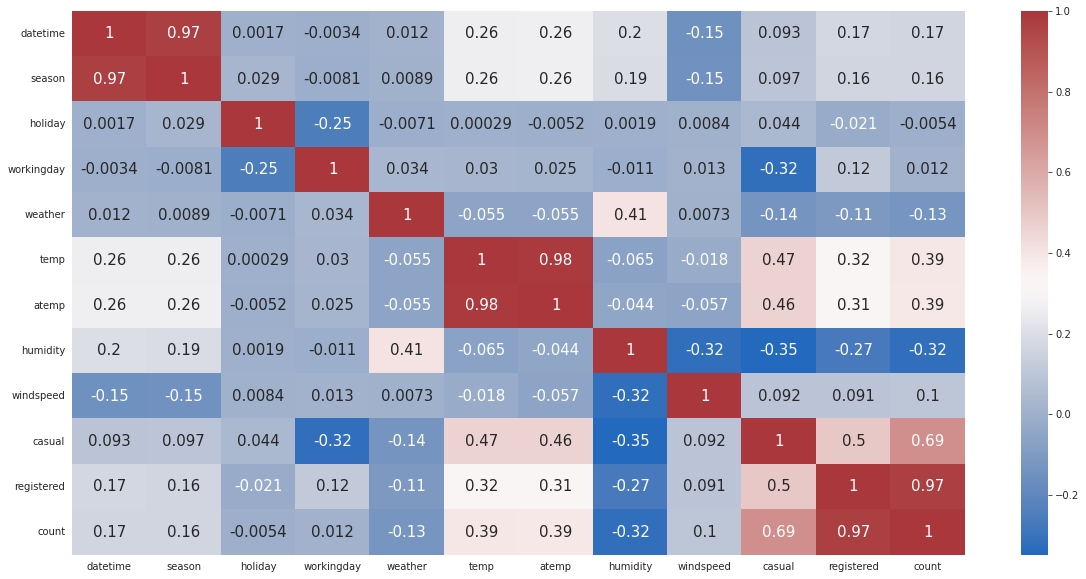

In [ ]:
corr = months.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15}, cmap = "vlag")

[Text(0.5, 1.0, 'Number of bikes in holidays')]

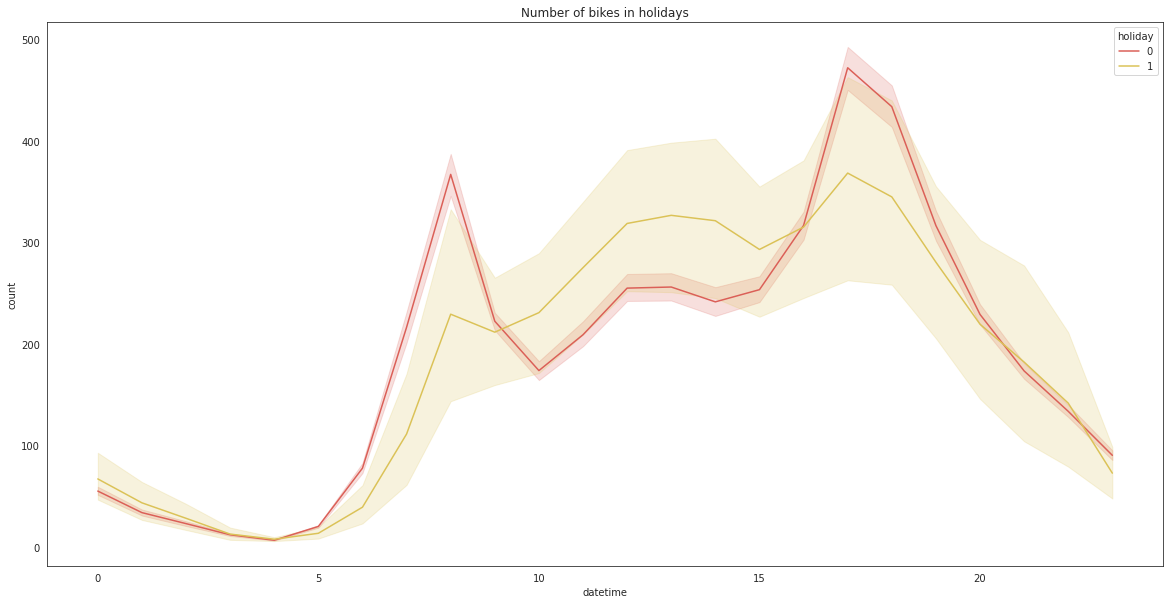

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style("white")
sns.lineplot(data=new_bike_train, x='datetime', y='count', hue='holiday', ax=ax)
ax.set(title='Number of bikes in holidays')

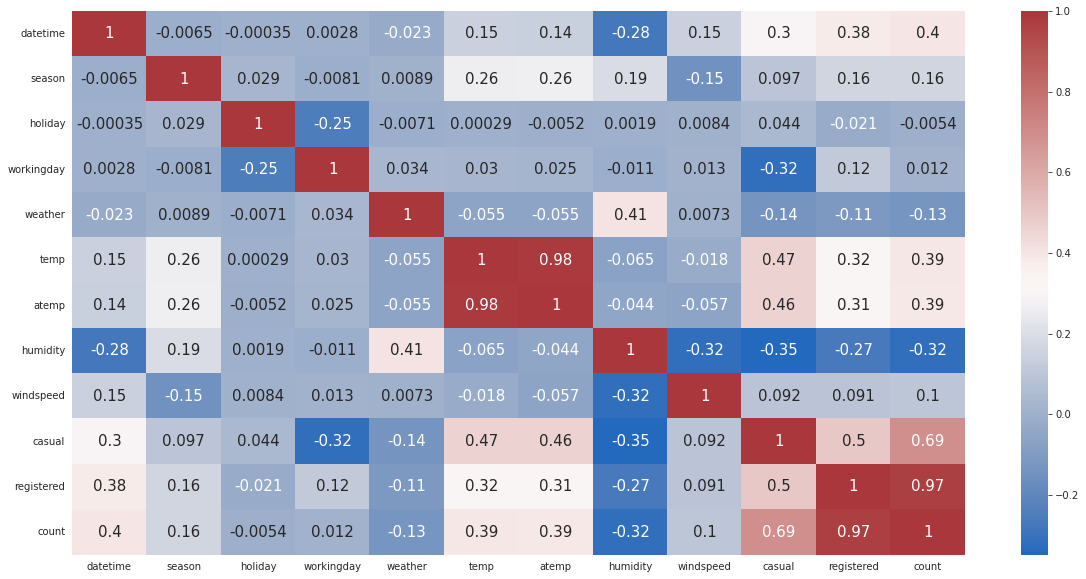

In [ ]:
corr = new_bike_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15}, cmap = "vlag")

[Text(0.5, 1.0, 'Number of bikes in diferent humidities')]

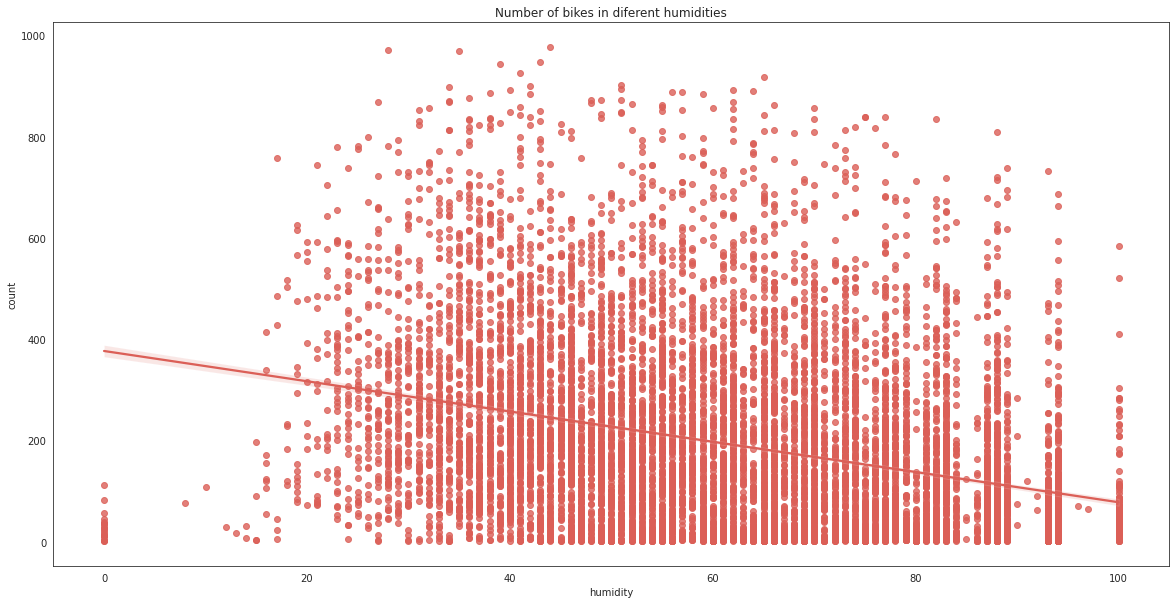

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style("white")
sns.regplot(data=new_bike_train, x='humidity', y='count', ax=ax)
ax.set(title='Number of bikes in diferent humidities')

[Text(0.5, 1.0, 'Number of bikes in diferent wind speeds')]

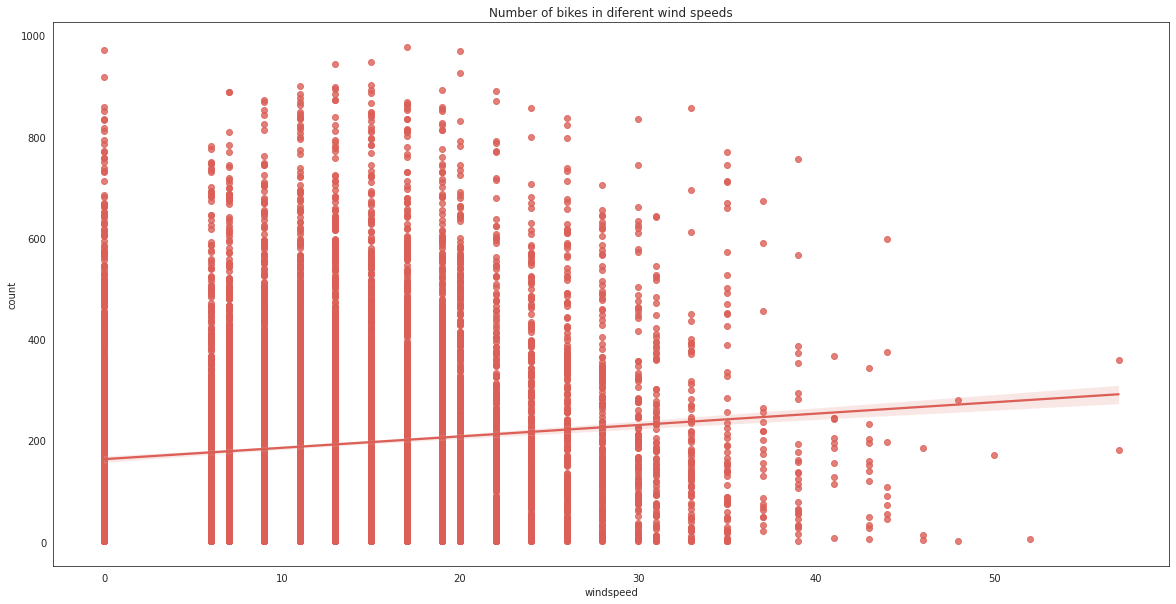

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style("white")
sns.regplot(data=new_bike_train, x='windspeed', y='count', ax=ax)
ax.set(title='Number of bikes in diferent wind speeds')

[Text(0.5, 1.0, 'Number of bikes in diferent temperatures')]

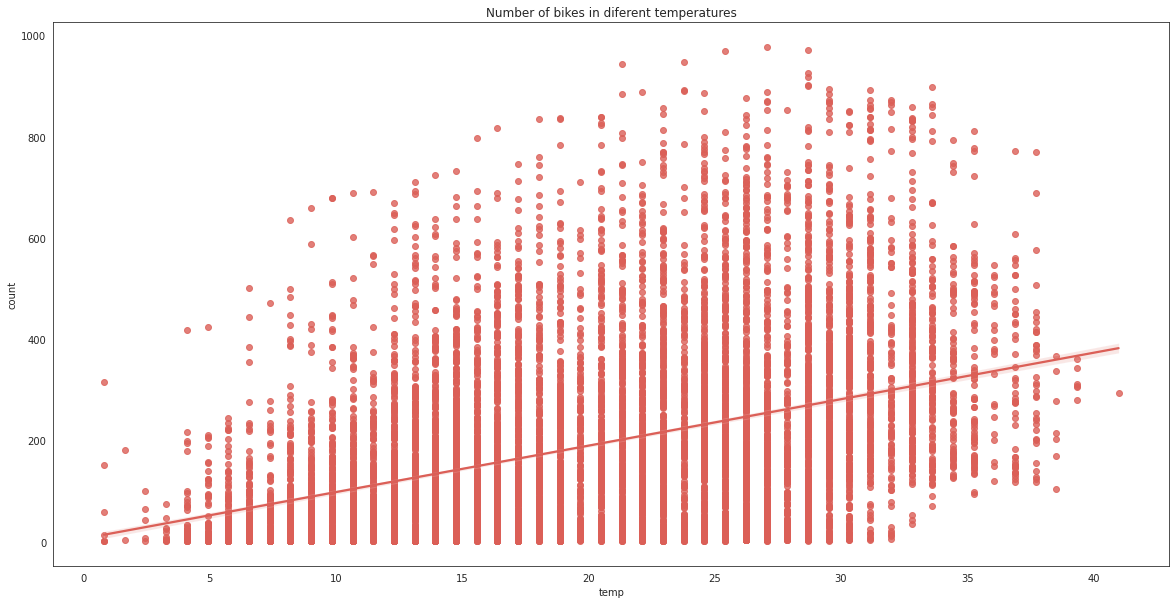

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style("white")
sns.regplot(data=new_bike_train, x='temp', y='count', ax=ax)
ax.set(title='Number of bikes in diferent temperatures')

[Text(0.5, 1.0, 'Number of bikes in diferent seasons')]

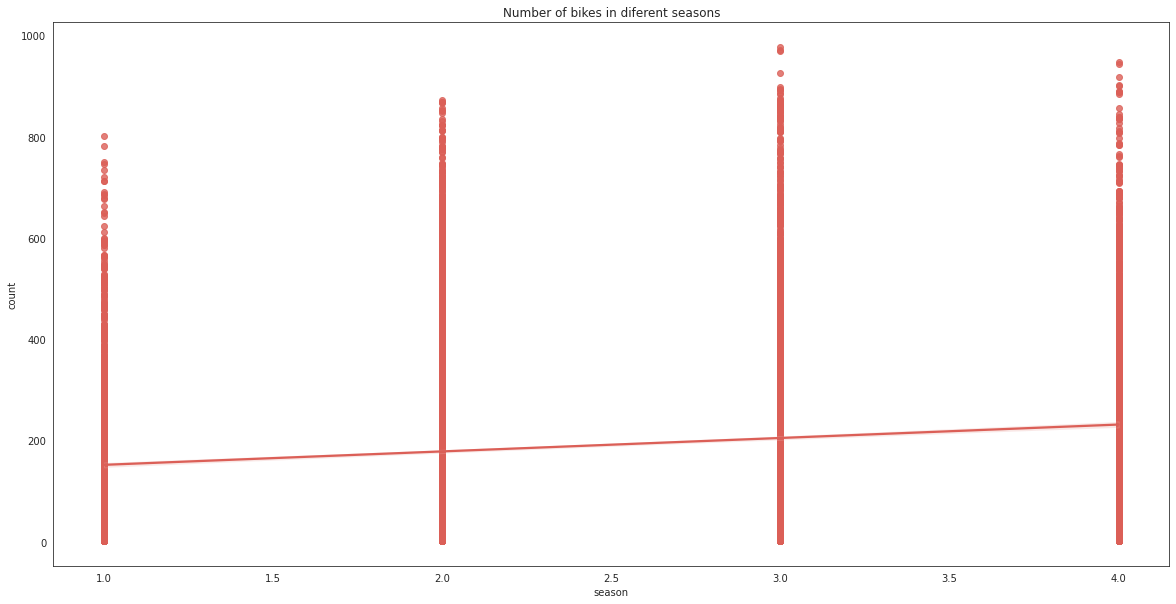

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style("white")
sns.regplot(data=new_bike_train, x='season', y='count', ax=ax)
ax.set(title='Number of bikes in diferent seasons')

[Text(0.5, 1.0, 'Number of bikes in diferent weathers')]

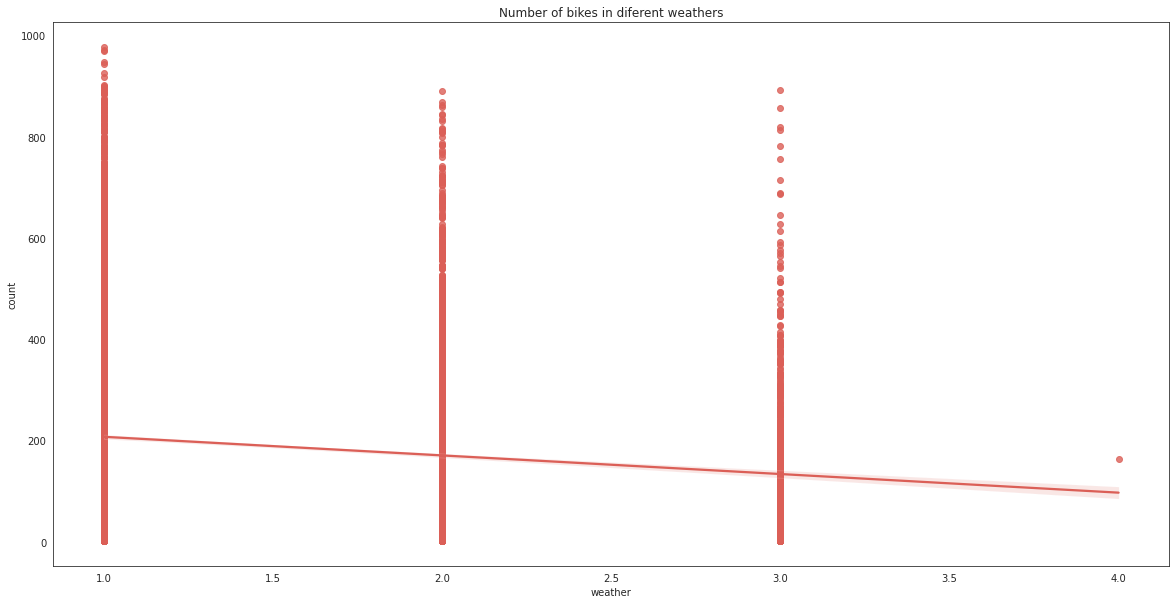

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style("white")
sns.regplot(data=new_bike_train, x='weather', y='count', ax=ax)
ax.set(title='Number of bikes in diferent weathers')

In [ ]:
# resultados obtidos a partir da otimização número de leaf nodes 
def get_mae(max_leaf_nodes, train_x, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_x, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [5, 50, 500, 3000, 5000, 10000]:
    my_mae = get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  92
Max leaf nodes: 50  		 Mean Absolute Error:  47
Max leaf nodes: 500  		 Mean Absolute Error:  33
Max leaf nodes: 3000  		 Mean Absolute Error:  34
Max leaf nodes: 5000  		 Mean Absolute Error:  35
Max leaf nodes: 10000  		 Mean Absolute Error:  35


In [ ]:
new_bike_train['years']= years.datetime
new_bike_train['months']= months.datetime
new_bike_train['days']= days.datetime
new_bike_train['hours']= new_bike_train.datetime
new_bike_train['rem_humidity'] = remeaned_train.humidity
new_bike_train['rem_temperature'] = remeaned_train.temp
new_bike_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,years,months,days,hours,rem_humidity,rem_temperature
0,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,19.11354,-10.39086
1,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,18.11354,-11.21086
2,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,18.11354,-11.21086
3,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,13.11354,-10.39086
4,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,13.11354,-10.39086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,-11.88646,-4.65086
10882,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,-4.88646,-5.47086
10883,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,-0.88646,-6.29086
10884,22,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,-0.88646,-6.29086


# **Treinando o modelo**

---



In [ ]:
new_bike_train_mean = new_bike_train.mean()
def remean(row):
    row = row - new_bike_train_mean
    return row

remeaned_train = new_bike_train.apply(remean, axis='columns')

In [ ]:
from sklearn.model_selection import train_test_split

y = remeaned_train['count']
new_bike_train_features = ['hours','days', 'months', 'years','workingday','weather','rem_temperature','rem_humidity', 'season']
x = remeaned_train[new_bike_train_features]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_x, train_y)
bike_predictions = forest_model.predict(test_x)
mae = mean_absolute_error(test_y, bike_predictions)
print(mae)

26.70341138659321


In [ ]:
from sklearn.tree import DecisionTreeRegressor
def get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_x, train_y)
    preds_val = model.predict(test_x)
    mae = mean_absolute_error(test_y, preds_val)
    return(mae)

for max_leaf_nodes in [5, 50, 100, 150, 500, 3000, 5000, 10000]:
    my_mae = get_mae(max_leaf_nodes, train_x, test_x, train_y, test_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  92
Max leaf nodes: 50  		 Mean Absolute Error:  47
Max leaf nodes: 100  		 Mean Absolute Error:  41
Max leaf nodes: 150  		 Mean Absolute Error:  38
Max leaf nodes: 500  		 Mean Absolute Error:  33
Max leaf nodes: 3000  		 Mean Absolute Error:  35
Max leaf nodes: 5000  		 Mean Absolute Error:  35
Max leaf nodes: 10000  		 Mean Absolute Error:  36
